# 🔍 Étape 1 : Exploration des Données Immobilières

## 📋 Objectifs de cette étape
1. **Acquérir** un jeu de données immobilier réaliste
2. **Explorer** la structure et la qualité des données
3. **Comprendre** les variables et leurs distributions
4. **Identifier** les patterns et corrélations
5. **Détecter** les valeurs aberrantes et manquantes

---

## 🛠️ Configuration et Imports

In [5]:
# Configuration générale
import warnings
warnings.filterwarnings('ignore')

# Manipulation des données
import pandas as pd
import numpy as np
from pathlib import Path

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Paramètres d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Configuration terminée !")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📊 NumPy version: {np.__version__}")

✅ Configuration terminée !
📦 Pandas version: 2.3.2
📊 NumPy version: 2.3.3


## 📊 Chargement du Dataset

Nous allons utiliser un véritable dataset immobilier contenant **545 propriétés** avec **13 caractéristiques** différentes. Ce dataset inclut des variables comme la surface, le nombre de chambres, les équipements, etc.

In [6]:
# 1. Chargement du dataset réel
data_path = Path('../data/Housing Prices Dataset/Housing.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
    print("✅ Dataset chargé avec succès !")
    print(f"📊 Dimensions: {df.shape[0]} propriétés × {df.shape[1]} variables")
    print(f"📋 Variables disponibles: {list(df.columns)}")
else:
    print("❌ Fichier non trouvé. Vérifiez le chemin.")

# 2. Première inspection du dataset
print("\n🔍 APERÇU DU DATASET:")
print("=" * 40)
print(df.head())

print(f"\n📊 INFORMATIONS GÉNÉRALES:")
print(f"   • Nombre de propriétés: {len(df):,}")
print(f"   • Nombre de variables: {df.shape[1]}")
print(f"   • Valeurs manquantes: {df.isnull().sum().sum()}")
print(f"   • Taille en mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 3. Analyse des prix
print(f"\n💰 STATISTIQUES DES PRIX:")
print(f"   • Prix minimum: {df['price'].min():,}")
print(f"   • Prix maximum: {df['price'].max():,}") 
print(f"   • Prix moyen: {df['price'].mean():,.0f}")
print(f"   • Prix médian: {df['price'].median():,.0f}")

print(f"\n🏡 CARACTÉRISTIQUES DES BIENS:")
print(f"   • Surface moyenne: {df['area'].mean():.0f} sq ft")
print(f"   • Chambres moyennes: {df['bedrooms'].mean():.1f}")
print(f"   • Salles de bain moyennes: {df['bathrooms'].mean():.1f}")
print(f"   • Étages moyens: {df['stories'].mean():.1f}")

✅ Dataset chargé avec succès !
📊 Dimensions: 545 propriétés × 13 variables
📋 Variables disponibles: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

🔍 APERÇU DU DATASET:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
0  13300000  7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
1  12250000  8960         4          4        4      yes        no       no              no             yes        3       no        furnished
2  12250000  9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
3  12215000  7500         4          2        2      yes        no      yes              no             yes        3      yes        f

In [7]:
# 4. Analyse des variables catégorielles
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

print("🏷️ ANALYSE DES VARIABLES CATÉGORIELLES:")
print("=" * 50)

for var in categorical_vars:
    print(f"\n📊 {var.upper()}:")
    print("-" * 30)
    counts = df[var].value_counts()
    percentages = (counts / len(df) * 100).round(1)
    
    for value, count in counts.items():
        pct = percentages[value]
        print(f"   {value:15s}: {count:3d} ({pct:4.1f}%)")

# 5. Conversion des variables catégorielles binaires
print(f"\n🔄 PRÉPARATION DES DONNÉES:")
print("=" * 35)

# Créer une copie pour les transformations
df_processed = df.copy()

# Variables binaires yes/no -> 1/0
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea']

for var in binary_vars:
    df_processed[var] = df_processed[var].map({'yes': 1, 'no': 0})
    print(f"   ✅ {var}: yes/no → 1/0")

# Variable furnishingstatus -> numérique
furnishing_map = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
df_processed['furnishingstatus'] = df_processed['furnishingstatus'].map(furnishing_map)
print(f"   ✅ furnishingstatus: furnished(2), semi-furnished(1), unfurnished(0)")

print(f"\n📊 Dataset préparé:")
print(f"   • Variables numériques: {df_processed.select_dtypes(include=[np.number]).shape[1]}")
print(f"   • Variables catégorielles restantes: {df_processed.select_dtypes(include=['object']).shape[1]}")

🏷️ ANALYSE DES VARIABLES CATÉGORIELLES:

📊 MAINROAD:
------------------------------
   yes            : 468 (85.9%)
   no             :  77 (14.1%)

📊 GUESTROOM:
------------------------------
   no             : 448 (82.2%)
   yes            :  97 (17.8%)

📊 BASEMENT:
------------------------------
   no             : 354 (65.0%)
   yes            : 191 (35.0%)

📊 HOTWATERHEATING:
------------------------------
   no             : 520 (95.4%)
   yes            :  25 ( 4.6%)

📊 AIRCONDITIONING:
------------------------------
   no             : 373 (68.4%)
   yes            : 172 (31.6%)

📊 PREFAREA:
------------------------------
   no             : 417 (76.5%)
   yes            : 128 (23.5%)

📊 FURNISHINGSTATUS:
------------------------------
   semi-furnished : 227 (41.7%)
   unfurnished    : 178 (32.7%)
   furnished      : 140 (25.7%)

🔄 PRÉPARATION DES DONNÉES:
   ✅ mainroad: yes/no → 1/0
   ✅ guestroom: yes/no → 1/0
   ✅ basement: yes/no → 1/0
   ✅ hotwaterheating: yes/no → 1/0
 

In [8]:
# 6. Analyse approfondie des prix en fonction des caractéristiques

print("💰 ANALYSE DES PRIX PAR CARACTÉRISTIQUES:")
print("=" * 50)

# Prix par nombre de chambres
print("\n🛏️ PRIX MOYEN PAR NOMBRE DE CHAMBRES:")
prix_chambres = df.groupby('bedrooms')['price'].agg(['mean', 'count', 'std']).round(0)
prix_chambres.columns = ['Prix moyen', 'Nombre', 'Écart-type']
print(prix_chambres)

# Prix par superficie (quartiles)
print("\n📐 PRIX MOYEN PAR QUARTILE DE SUPERFICIE:")
df['area_quartile'] = pd.qcut(df['area'], 4, labels=['Petit', 'Moyen', 'Grand', 'Très grand'])
prix_superficie = df.groupby('area_quartile')['price'].agg(['mean', 'count']).round(0)
prix_superficie.columns = ['Prix moyen', 'Nombre']
print(prix_superficie)

# Prix par statut d'ameublement
print("\n🪑 PRIX MOYEN PAR STATUT D'AMEUBLEMENT:")
prix_meuble = df.groupby('furnishingstatus')['price'].agg(['mean', 'count']).round(0)
prix_meuble.columns = ['Prix moyen', 'Nombre']
print(prix_meuble)

# Prix avec vs sans équipements premium
print("\n⭐ IMPACT DES ÉQUIPEMENTS PREMIUM SUR LE PRIX:")
equipements = ['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for equip in equipements:
    prix_avec = df[df[equip] == 'yes']['price'].mean()
    prix_sans = df[df[equip] == 'no']['price'].mean()
    difference = prix_avec - prix_sans
    pct_difference = (difference / prix_sans) * 100
    
    print(f"   {equip:15s}: +{difference:,.0f} € (+{pct_difference:4.1f}%)")

💰 ANALYSE DES PRIX PAR CARACTÉRISTIQUES:

🛏️ PRIX MOYEN PAR NOMBRE DE CHAMBRES:
          Prix moyen  Nombre  Écart-type
bedrooms                                
1          2712500.0       2    618718.0
2          3632022.0     136   1004024.0
3          4954598.0     300   1747527.0
4          5729758.0      95   2307740.0
5          5819800.0      10   2502315.0
6          4791500.0       2   1826457.0

📐 PRIX MOYEN PAR QUARTILE DE SUPERFICIE:
               Prix moyen  Nombre
area_quartile                    
Petit           3536094.0     144
Moyen           4102658.0     133
Grand           5289105.0     133
Très grand      6219003.0     135

🪑 PRIX MOYEN PAR STATUT D'AMEUBLEMENT:
                  Prix moyen  Nombre
furnishingstatus                    
furnished          5495696.0     140
semi-furnished     4907524.0     227
unfurnished        4013831.0     178

⭐ IMPACT DES ÉQUIPEMENTS PREMIUM SUR LE PRIX:
   guestroom      : +1,248,351 € (+27.5%)
   basement       : +732,649 € (

In [9]:
# 7. Détection des valeurs aberrantes naturelles dans le dataset

def detect_outliers_iqr(data, column):
    """Détecte les outliers avec la méthode IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("🚨 DÉTECTION DES VALEURS ABERRANTES NATURELLES:")
print("=" * 55)

# Variables numériques principales à vérifier
numeric_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

outliers_summary = {}
for var in numeric_vars:
    outliers, lower, upper = detect_outliers_iqr(df, var)
    pct_outliers = len(outliers) / len(df) * 100
    outliers_summary[var] = len(outliers)
    
    print(f"\n📊 {var.upper()}:")
    print(f"   Seuil inférieur: {lower:,.1f}")
    print(f"   Seuil supérieur: {upper:,.1f}")
    print(f"   Nombre d'outliers: {len(outliers)} ({pct_outliers:.1f}%)")
    
    if len(outliers) > 0:
        print(f"   Valeurs extrêmes:")
        print(f"     Min outlier: {outliers[var].min():,.1f}")
        print(f"     Max outlier: {outliers[var].max():,.1f}")

print(f"\n📋 RÉSUMÉ DES OUTLIERS:")
total_outliers = sum(outliers_summary.values())
print(f"   Total d'outliers détectés: {total_outliers}")
print(f"   Variables avec outliers: {sum(1 for count in outliers_summary.values() if count > 0)}")

# Affichage des propriétés avec le plus d'outliers
outlier_indices = set()
for var in numeric_vars:
    outliers, _, _ = detect_outliers_iqr(df, var)
    outlier_indices.update(outliers.index)

if outlier_indices:
    print(f"\n🏠 PROPRIÉTÉS AVEC DES VALEURS EXTRÊMES:")
    extreme_properties = df.loc[list(outlier_indices)][['price', 'area', 'bedrooms', 'bathrooms']]
    print(extreme_properties.head())

print("\n✅ Détection des outliers naturels terminée!")
print(f"📊 Dataset shape: {df.shape}")
print(f"📊 Aucune valeur manquante: {df.isnull().sum().sum() == 0}")

🚨 DÉTECTION DES VALEURS ABERRANTES NATURELLES:

📊 PRICE:
   Seuil inférieur: -35,000.0
   Seuil supérieur: 9,205,000.0
   Nombre d'outliers: 15 (2.8%)
   Valeurs extrêmes:
     Min outlier: 9,240,000.0
     Max outlier: 13,300,000.0

📊 AREA:
   Seuil inférieur: -540.0
   Seuil supérieur: 10,500.0
   Nombre d'outliers: 12 (2.2%)
   Valeurs extrêmes:
     Min outlier: 10,700.0
     Max outlier: 16,200.0

📊 BEDROOMS:
   Seuil inférieur: 0.5
   Seuil supérieur: 4.5
   Nombre d'outliers: 12 (2.2%)
   Valeurs extrêmes:
     Min outlier: 5.0
     Max outlier: 6.0

📊 BATHROOMS:
   Seuil inférieur: -0.5
   Seuil supérieur: 3.5
   Nombre d'outliers: 1 (0.2%)
   Valeurs extrêmes:
     Min outlier: 4.0
     Max outlier: 4.0

📊 STORIES:
   Seuil inférieur: -0.5
   Seuil supérieur: 3.5
   Nombre d'outliers: 41 (7.5%)
   Valeurs extrêmes:
     Min outlier: 4.0
     Max outlier: 4.0

📊 PARKING:
   Seuil inférieur: -1.5
   Seuil supérieur: 2.5
   Nombre d'outliers: 12 (2.2%)
   Valeurs extrêmes:
     M

In [10]:
# 8. Sauvegarde du dataset nettoyé
from pathlib import Path

processed_data_path = Path('../data/processed')
processed_data_path.mkdir(parents=True, exist_ok=True)

# Sauvegarder le dataset original et traité
df.to_csv(processed_data_path / 'housing_original.csv', index=False)
df_processed.to_csv(processed_data_path / 'housing_processed.csv', index=False)

print(f"💾 Datasets sauvegardés:")
print(f"   • Original: {processed_data_path / 'housing_original.csv'}")
print(f"   • Traité: {processed_data_path / 'housing_processed.csv'}")

# 9. Aperçu final des données
print(f"\n📋 APERÇU FINAL DES DONNÉES:")
print("=" * 40)
print("Dataset original (5 premières lignes):")
print(df.head())

print(f"\nDataset traité (5 premières lignes):")
print(df_processed.head())

print(f"\n📊 COMPARAISON AVANT/APRÈS TRAITEMENT:")
print(f"   • Variables catégorielles (avant): {df.select_dtypes(include=['object']).shape[1]}")
print(f"   • Variables catégorielles (après): {df_processed.select_dtypes(include=['object']).shape[1]}")
print(f"   • Variables numériques (avant): {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"   • Variables numériques (après): {df_processed.select_dtypes(include=[np.number]).shape[1]}")

print(f"\n✅ Sauvegarde terminée avec succès!")
print(f"📊 Prêt pour l'étape suivante : Nettoyage et modélisation")

💾 Datasets sauvegardés:
   • Original: ..\data\processed\housing_original.csv
   • Traité: ..\data\processed\housing_processed.csv

📋 APERÇU FINAL DES DONNÉES:
Dataset original (5 premières lignes):
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus area_quartile
0  13300000  7420         4          2        3      yes        no       no              no             yes        2      yes        furnished    Très grand
1  12250000  8960         4          4        4      yes        no       no              no             yes        3       no        furnished    Très grand
2  12250000  9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished    Très grand
3  12215000  7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished    Très grand
4  11410000  742

In [11]:
# Test rapide - Vérification que tout fonctionne
print("🧪 TEST RAPIDE:")
print("=" * 20)
print(f"✅ Dataset chargé: {df.shape}")
print(f"✅ Dataset traité créé: {df_processed.shape}")
print(f"✅ Variables numériques: {df_processed.select_dtypes(include=[np.number]).columns.tolist()}")
print("✅ Tout semble fonctionner correctement!")

🧪 TEST RAPIDE:
✅ Dataset chargé: (545, 14)
✅ Dataset traité créé: (545, 13)
✅ Variables numériques: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
✅ Tout semble fonctionner correctement!


## 🔍 Exploration Initiale des Données

Maintenant que nous avons notre dataset, explorons sa structure et ses caractéristiques.

In [12]:
# Vérifier si les données sont chargées, sinon les charger
if 'df' not in locals():
    print("⚠️  Données non chargées, chargement en cours...")
    from pathlib import Path
    import pandas as pd
    import numpy as np
    
    data_path = Path('../data/Housing Prices Dataset/Housing.csv')
    if data_path.exists():
        df = pd.read_csv(data_path)
        print(f"✅ Dataset rechargé: {df.shape[0]} propriétés × {df.shape[1]} variables")
    else:
        print("❌ Fichier Housing.csv non trouvé!")
        print("Veuillez vérifier le chemin vers le fichier de données.")

# Informations générales sur le dataset réel
if 'df' in locals():
    print("🔍 INFORMATIONS GÉNÉRALES SUR LE DATASET")
    print("=" * 50)
    print(f"📊 Dimensions: {df.shape[0]:,} propriétés × {df.shape[1]} variables")
    print(f"💾 Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"🌍 Dataset: Housing Prices Dataset")

    print("\n📋 VARIABLES DISPONIBLES:")
    print("=" * 35)
    for i, col in enumerate(df.columns, 1):
        col_type = "Numérique" if df[col].dtype in ['int64', 'float64'] else "Catégorielle"
        print(f"   {i:2d}. {col:18s} ({col_type})")

    print("\n📋 TYPES DE DONNÉES:")
    print("=" * 25)
    print(df.dtypes)

    print("\n❌ VALEURS MANQUANTES:")
    print("=" * 30)
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("   ✅ Aucune valeur manquante détectée!")
    else:
        missing_pct = (missing / len(df)) * 100
        missing_df = pd.DataFrame({
            'Valeurs manquantes': missing,
            'Pourcentage': missing_pct
        })
        print(missing_df[missing_df['Valeurs manquantes'] > 0])

    print("\n🏠 CARACTÉRISTIQUES DU MARCHÉ:")
    print("=" * 40)
    print(f"   • Prix moyen: {df['price'].mean():,.0f}")
    print(f"   • Surface moyenne: {df['area'].mean():.0f} sq ft")
    print(f"   • Range de prix: {df['price'].min():,} - {df['price'].max():,}")
    print(f"   • Range de surface: {df['area'].min()} - {df['area'].max()} sq ft")
else:
    print("❌ Impossible d'afficher les informations - données non disponibles.")
    print("💡 Conseil: Vérifiez le chemin vers le fichier Housing.csv")

🔍 INFORMATIONS GÉNÉRALES SUR LE DATASET
📊 Dimensions: 545 propriétés × 14 variables
💾 Taille mémoire: 0.25 MB
🌍 Dataset: Housing Prices Dataset

📋 VARIABLES DISPONIBLES:
    1. price              (Numérique)
    2. area               (Numérique)
    3. bedrooms           (Numérique)
    4. bathrooms          (Numérique)
    5. stories            (Numérique)
    6. mainroad           (Catégorielle)
    7. guestroom          (Catégorielle)
    8. basement           (Catégorielle)
    9. hotwaterheating    (Catégorielle)
   10. airconditioning    (Catégorielle)
   11. parking            (Numérique)
   12. prefarea           (Catégorielle)
   13. furnishingstatus   (Catégorielle)
   14. area_quartile      (Catégorielle)

📋 TYPES DE DONNÉES:
price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad              object
guestroom             object
basement              object
hotwaterheating      

In [13]:
# Statistiques descriptives pour le dataset Housing
print("📊 STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES")
print("=" * 60)

# Sélectionner les variables numériques
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric_stats = df[numeric_columns].describe()

# Afficher avec formatage amélioré
print(df_numeric_stats)

print(f"\n📈 STATISTIQUES ADDITIONNELLES:")
print("=" * 40)

# Statistiques spécifiques pour chaque variable clé
key_stats = {
    'price': {'unit': '€', 'desc': 'Prix de vente'},
    'area': {'unit': 'sq ft', 'desc': 'Surface habitable'},
    'bedrooms': {'unit': 'pièces', 'desc': 'Chambres'},
    'bathrooms': {'unit': 'pièces', 'desc': 'Salles de bain'},
    'stories': {'unit': 'étages', 'desc': 'Nombre d\'étages'},
    'parking': {'unit': 'places', 'desc': 'Places de parking'}
}

for var, info in key_stats.items():
    if var in df.columns:
        print(f"\n🏷️ {info['desc'].upper()} ({info['unit']}):")
        print(f"   Moyenne: {df[var].mean():,.1f}")
        print(f"   Médiane: {df[var].median():,.1f}")
        print(f"   Écart-type: {df[var].std():,.1f}")
        print(f"   Range: {df[var].min()} - {df[var].max()}")
        
        # Afficher la distribution pour les variables discrètes
        if var in ['bedrooms', 'bathrooms', 'stories', 'parking']:
            print(f"   Distribution: {dict(df[var].value_counts().sort_index())}")

📊 STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES
              price          area    bedrooms   bathrooms     stories     parking
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  545.000000
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505    0.693578
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492    0.861586
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000    0.000000
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000    0.000000
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000    0.000000
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000    1.000000
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000    3.000000

📈 STATISTIQUES ADDITIONNELLES:

🏷️ PRIX DE VENTE (€):
   Moyenne: 4,766,729.2
   Médiane: 4,340,000.0
   Écart-type: 1,870,439.6
   Range: 1750000 - 13300000

🏷️ SURFACE HABITABLE (sq ft):
   Moyenne: 5,150.5
 

In [14]:
# Vérifier si les données sont chargées, sinon les charger
if 'df' not in locals():
    print("⚠️  Données non chargées, chargement en cours...")
    from pathlib import Path
    import pandas as pd
    import numpy as np
    
    data_path = Path('../data/Housing Prices Dataset/Housing.csv')
    if data_path.exists():
        df = pd.read_csv(data_path)
        print(f"✅ Dataset rechargé: {df.shape[0]} propriétés × {df.shape[1]} variables")
    else:
        print("❌ Fichier Housing.csv non trouvé!")

# Statistiques pour les variables catégorielles du dataset Housing
print("📊 STATISTIQUES DESCRIPTIVES - VARIABLES CATÉGORIELLES")
print("=" * 65)

# Variables catégorielles réelles du dataset Housing
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

if 'df' in locals():
    for col in categorical_cols:
        if col in df.columns:
            print(f"\n🏷️ {col.upper()}:")
            print("-" * 30)
            value_counts = df[col].value_counts()
            percentages = (value_counts / len(df) * 100).round(1)
            
            result_df = pd.DataFrame({
                'Fréquence': value_counts,
                'Pourcentage': percentages
            })
            print(result_df)
        else:
            print(f"\n⚠️ Variable '{col}' non trouvée dans le dataset")
    
    # Résumé des variables catégorielles
    print(f"\n📊 RÉSUMÉ VARIABLES CATÉGORIELLES:")
    print(f"   Total variables catégorielles: {len([col for col in categorical_cols if col in df.columns])}")
    print(f"   Variables yes/no: {len([col for col in categorical_cols[:-1] if col in df.columns])}")
    print(f"   Variables à valeurs multiples: 1 (furnishingstatus)")
else:
    print("❌ Impossible d'afficher les statistiques - données non disponibles.")
    print("💡 Conseil: Exécutez d'abord les cellules de chargement des données.")

📊 STATISTIQUES DESCRIPTIVES - VARIABLES CATÉGORIELLES

🏷️ MAINROAD:
------------------------------
          Fréquence  Pourcentage
mainroad                        
yes             468         85.9
no               77         14.1

🏷️ GUESTROOM:
------------------------------
           Fréquence  Pourcentage
guestroom                        
no               448         82.2
yes               97         17.8

🏷️ BASEMENT:
------------------------------
          Fréquence  Pourcentage
basement                        
no              354         65.0
yes             191         35.0

🏷️ HOTWATERHEATING:
------------------------------
                 Fréquence  Pourcentage
hotwaterheating                        
no                     520         95.4
yes                     25          4.6

🏷️ AIRCONDITIONING:
------------------------------
                 Fréquence  Pourcentage
airconditioning                        
no                     373         68.4
yes                    172

## 📊 Visualisations Exploratoires

Créons des visualisations pour mieux comprendre nos données.

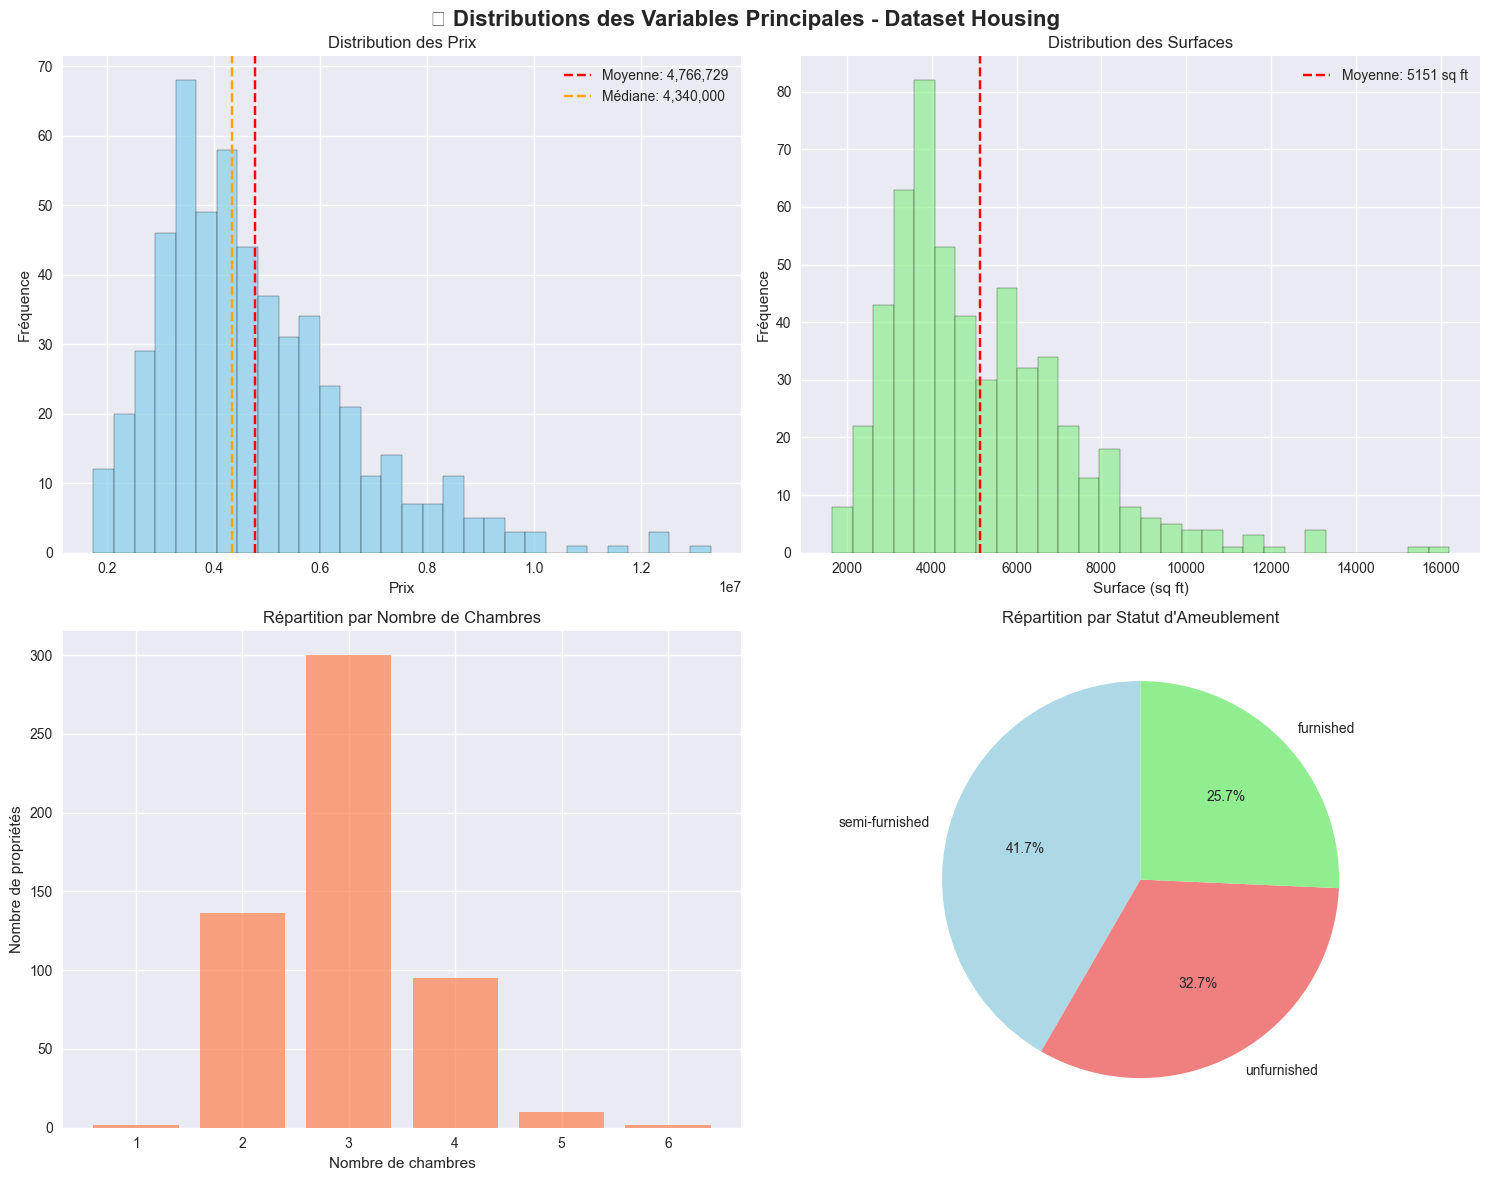

📊 RÉSUMÉ DES DISTRIBUTIONS:
💰 Prix: 1,750,000 à 13,300,000 (CV: 0.39)
📐 Surface: 1650 à 16200 sq ft (CV: 0.42)
🛏️ Chambres: 1 à 6 (mode: 3)
🪑 Ameublement: semi-furnished(227), unfurnished(178), furnished(140)


In [15]:
# Visualisations adaptées au dataset Housing réel
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🏠 Distributions des Variables Principales - Dataset Housing', fontsize=16, fontweight='bold')

# Distribution des prix
axes[0, 0].hist(df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['price'].mean(), color='red', linestyle='--', 
                  label=f'Moyenne: {df["price"].mean():,.0f}')
axes[0, 0].axvline(df['price'].median(), color='orange', linestyle='--', 
                  label=f'Médiane: {df["price"].median():,.0f}')
axes[0, 0].set_title('Distribution des Prix')
axes[0, 0].set_xlabel('Prix')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].legend()
axes[0, 0].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# Distribution des surfaces
axes[0, 1].hist(df['area'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].axvline(df['area'].mean(), color='red', linestyle='--', 
                  label=f'Moyenne: {df["area"].mean():.0f} sq ft')
axes[0, 1].set_title('Distribution des Surfaces')
axes[0, 1].set_xlabel('Surface (sq ft)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].legend()

# Distribution par nombre de chambres
bedroom_counts = df['bedrooms'].value_counts().sort_index()
axes[1, 0].bar(bedroom_counts.index, bedroom_counts.values, alpha=0.7, color='coral')
axes[1, 0].set_title('Répartition par Nombre de Chambres')
axes[1, 0].set_xlabel('Nombre de chambres')
axes[1, 0].set_ylabel('Nombre de propriétés')

# Distribution par statut d'ameublement
furnish_counts = df['furnishingstatus'].value_counts()
axes[1, 1].pie(furnish_counts.values, labels=furnish_counts.index, 
               autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1, 1].set_title('Répartition par Statut d\'Ameublement')

plt.tight_layout()
plt.show()

# Statistiques résumées par graphique
print("📊 RÉSUMÉ DES DISTRIBUTIONS:")
print("=" * 35)
print(f"💰 Prix: {df['price'].min():,} à {df['price'].max():,} (CV: {df['price'].std()/df['price'].mean():.2f})")
print(f"📐 Surface: {df['area'].min()} à {df['area'].max()} sq ft (CV: {df['area'].std()/df['area'].mean():.2f})")
print(f"🛏️ Chambres: {df['bedrooms'].min()} à {df['bedrooms'].max()} (mode: {df['bedrooms'].mode()[0]})")
print(f"🪑 Ameublement: {', '.join([f'{k}({v})' for k,v in df['furnishingstatus'].value_counts().items()])}")

In [16]:
# Analyse des prix par équipements - Graphiques interactifs
fig = px.box(df, x='furnishingstatus', y='price', 
            title='📊 Distribution des Prix par Statut d\'Ameublement',
            labels={'price': 'Prix', 'furnishingstatus': 'Statut d\'ameublement'},
            color='furnishingstatus')

fig.update_layout(height=500, showlegend=False)
fig.show()

# Analyse comparative des prix par équipements
print("💰 ANALYSE COMPARATIVE DES PRIX")
print("=" * 40)

# Prix par statut d'ameublement
prix_ameublement = df.groupby('furnishingstatus')['price'].agg(['mean', 'median', 'count']).round(0)
prix_ameublement.columns = ['Moyenne', 'Médiane', 'Nombre']
prix_ameublement = prix_ameublement.sort_values('Moyenne', ascending=False)
print("\n🪑 PRIX PAR STATUT D'AMEUBLEMENT:")
print(prix_ameublement)

# Prix par nombre de chambres
print("\n🛏️ PRIX PAR NOMBRE DE CHAMBRES:")
prix_chambres = df.groupby('bedrooms')['price'].agg(['mean', 'median', 'count']).round(0)
prix_chambres.columns = ['Moyenne', 'Médiane', 'Nombre']
print(prix_chambres)

# Impact des équipements premium
print("\n⭐ IMPACT DES ÉQUIPEMENTS PREMIUM:")
equipements_premium = ['airconditioning', 'guestroom', 'basement', 'hotwaterheating', 'prefarea']

for equip in equipements_premium:
    prix_avec = df[df[equip] == 'yes']['price'].mean()
    prix_sans = df[df[equip] == 'no']['price'].mean()
    difference = prix_avec - prix_sans
    pct_difference = (difference / prix_sans) * 100 if prix_sans > 0 else 0
    count_avec = len(df[df[equip] == 'yes'])
    
    print(f"   {equip:16s}: +{difference:8.0f} (+{pct_difference:4.1f}%) [{count_avec:3d} propriétés]")

# Analyse par superficie (quartiles)
print(f"\n📐 PRIX PAR QUARTILE DE SUPERFICIE:")
df['area_quartile'] = pd.qcut(df['area'], 4, labels=['Q1 (Petit)', 'Q2 (Moyen)', 'Q3 (Grand)', 'Q4 (Très grand)'])
prix_superficie = df.groupby('area_quartile')['price'].agg(['mean', 'count']).round(0)
prix_superficie.columns = ['Prix moyen', 'Nombre']
print(prix_superficie)

💰 ANALYSE COMPARATIVE DES PRIX

🪑 PRIX PAR STATUT D'AMEUBLEMENT:
                    Moyenne    Médiane  Nombre
furnishingstatus                              
furnished         5495696.0  5075000.0     140
semi-furnished    4907524.0  4585000.0     227
unfurnished       4013831.0  3430000.0     178

🛏️ PRIX PAR NOMBRE DE CHAMBRES:
            Moyenne    Médiane  Nombre
bedrooms                              
1         2712500.0  2712500.0       2
2         3632022.0  3535000.0     136
3         4954598.0  4620000.0     300
4         5729758.0  5250000.0      95
5         5819800.0  5582500.0      10
6         4791500.0  4791500.0       2

⭐ IMPACT DES ÉQUIPEMENTS PREMIUM:
   airconditioning : + 1821281 (+43.4%) [172 propriétés]
   guestroom       : + 1248351 (+27.5%) [ 97 propriétés]
   basement        : +  732649 (+16.2%) [191 propriétés]
   hotwaterheating : +  831367 (+17.6%) [ 25 propriétés]
   prefarea        : + 1453747 (+32.9%) [128 propriétés]

📐 PRIX PAR QUARTILE DE SUPERFICIE:

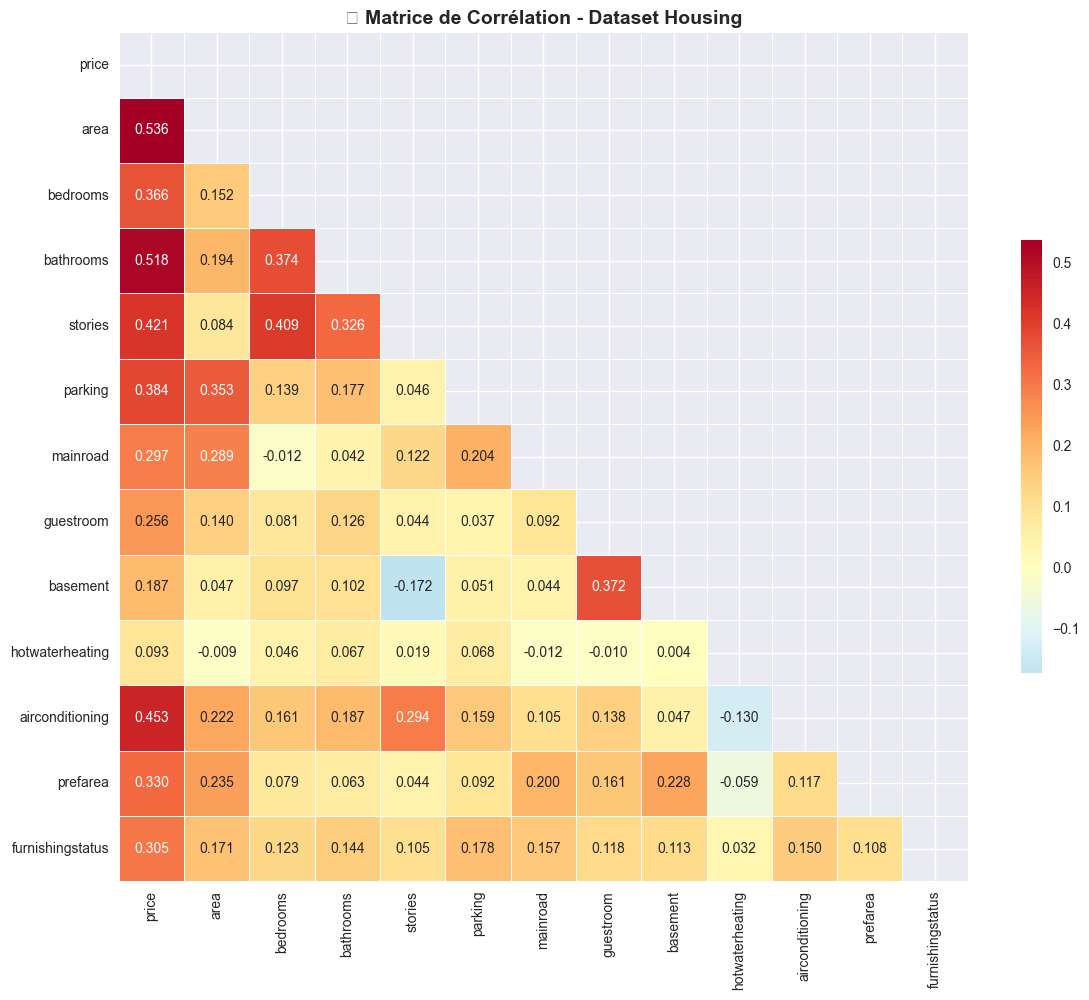


🎯 CORRÉLATIONS AVEC LE PRIX (par ordre décroissant):
area              : +0.536 (Modérée)
bathrooms         : +0.518 (Modérée)
airconditioning   : +0.453 (Modérée)
stories           : +0.421 (Modérée)
parking           : +0.384 (Faible)
bedrooms          : +0.366 (Faible)
prefarea          : +0.330 (Faible)
furnishingstatus  : +0.305 (Faible)
mainroad          : +0.297 (Faible)
guestroom         : +0.256 (Faible)
basement          : +0.187 (Faible)
hotwaterheating   : +0.093 (Faible)

🔍 VARIABLES LES PLUS CORRÉLÉES AU PRIX:
   1. area: 0.536
   2. bathrooms: 0.518
   3. airconditioning: 0.453

⚠️ ATTENTION - MULTICOLINÉARITÉ:
Variables potentiellement corrélées entre elles:
   ✅ Pas de multicolinéarité détectée (seuil 0.7)


In [17]:
# Matrice de corrélation pour le dataset Housing
# Utiliser le dataset traité avec variables numériques
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Ajouter les variables binaires traitées si disponibles
if 'df_processed' in locals():
    binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']
    # Utiliser le dataset traité pour la corrélation
    corr_data = df_processed[numeric_cols + binary_cols]
else:
    # Convertir temporairement pour la corrélation
    corr_data = df[numeric_cols].copy()
    # Ajouter les variables binaires converties temporairement
    binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea']
    for var in binary_vars:
        corr_data[var] = df[var].map({'yes': 1, 'no': 0})
    
    # Convertir furnishingstatus
    furnishing_map = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
    corr_data['furnishingstatus'] = df['furnishingstatus'].map(furnishing_map)

correlation_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, fmt='.3f')
plt.title('🔗 Matrice de Corrélation - Dataset Housing', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Corrélations avec le prix (valeurs absolues)
print("\n🎯 CORRÉLATIONS AVEC LE PRIX (par ordre décroissant):")
print("=" * 55)
correlations = correlation_matrix['price'].abs().sort_values(ascending=False)
for var, corr in correlations.items():
    if var != 'price':
        direction = "+" if correlation_matrix['price'][var] > 0 else "-"
        strength = "Forte" if corr > 0.7 else "Modérée" if corr > 0.4 else "Faible"
        print(f"{var:18s}: {direction}{corr:.3f} ({strength})")

# Identification des corrélations les plus importantes
print(f"\n🔍 VARIABLES LES PLUS CORRÉLÉES AU PRIX:")
top_correlations = correlations.drop('price').head(3)
for i, (var, corr) in enumerate(top_correlations.items(), 1):
    print(f"   {i}. {var}: {corr:.3f}")

print(f"\n⚠️ ATTENTION - MULTICOLINÉARITÉ:")
print("Variables potentiellement corrélées entre elles:")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = abs(correlation_matrix.iloc[i, j])
        if corr_value > 0.7:
            var1, var2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            if var1 != 'price' and var2 != 'price':
                high_corr_pairs.append((var1, var2, corr_value))

if high_corr_pairs:
    for var1, var2, corr in high_corr_pairs:
        print(f"   • {var1} ↔ {var2}: {corr:.3f}")
else:
    print("   ✅ Pas de multicolinéarité détectée (seuil 0.7)")

In [18]:
# Relation prix vs surface - Scatter plot interactif
fig = px.scatter(df, x='area', y='price', 
                color='furnishingstatus', size='bedrooms',
                hover_data=['bathrooms', 'stories', 'parking'],
                title='💰 Relation Prix vs Surface par Statut d\'Ameublement',
                labels={'area': 'Surface (sq ft)', 
                       'price': 'Prix',
                       'furnishingstatus': 'Ameublement',
                       'bedrooms': 'Chambres'})

fig.update_layout(height=600)
fig.show()

# Analyse de la relation prix-surface
print("📊 ANALYSE RELATION PRIX-SURFACE:")
print("=" * 40)

# Coefficient de corrélation
corr_prix_surface = df['price'].corr(df['area'])
print(f"Corrélation prix-surface: {corr_prix_surface:.3f}")

# Prix au mètre carré (conversion approximative: 1 sq ft ≈ 0.0929 m²)
df['price_per_sqft'] = df['price'] / df['area']
print(f"Prix moyen par sq ft: {df['price_per_sqft'].mean():.0f}")
print(f"Range prix/sq ft: {df['price_per_sqft'].min():.0f} - {df['price_per_sqft'].max():.0f}")

# Analyse par tranches de superficie
surface_bins = pd.cut(df['area'], bins=4, labels=['Petite', 'Moyenne', 'Grande', 'Très grande'])
prix_par_tranche = df.groupby(surface_bins).agg({
    'price': ['mean', 'count'],
    'price_per_sqft': 'mean'
}).round(0)

prix_par_tranche.columns = ['Prix moyen', 'Nombre', 'Prix/sq ft']
print(f"\n📐 ANALYSE PAR TRANCHE DE SUPERFICIE:")
print(prix_par_tranche)

# Graphique prix par sq ft
fig_price_sqft = px.histogram(df, x='price_per_sqft', bins=25,
                             title='📊 Distribution du Prix par sq ft',
                             labels={'price_per_sqft': 'Prix par sq ft'})
fig_price_sqft.show()

📊 ANALYSE RELATION PRIX-SURFACE:
Corrélation prix-surface: 0.536
Prix moyen par sq ft: 993
Range prix/sq ft: 270 - 2640

📐 ANALYSE PAR TRANCHE DE SUPERFICIE:
             Prix moyen  Nombre  Prix/sq ft
area                                       
Petite        3927781.0     318      1092.0
Moyenne       5890106.0     197       896.0
Grande        6135792.0      24       612.0
Très grande   6870500.0       6       488.0


TypeError: histogram() got an unexpected keyword argument 'bins'

## ⚠️ Détection des Valeurs Aberrantes

Identifions les outliers dans nos données.

In [ ]:
# Détection des outliers pour les variables du dataset Housing
variables_to_check = ['price', 'area', 'bedrooms']  # Variables disponibles dans le dataset

print("🚨 DÉTECTION DES VALEURS ABERRANTES")
print("=" * 45)

for var in variables_to_check:
    if var in df.columns:  # Vérifier que la variable existe
        outliers, lower, upper = detect_outliers_iqr(df, var)
        pct_outliers = len(outliers) / len(df) * 100
        
        print(f"\n📊 {var.upper()}:")
        print(f"   Seuil inférieur: {lower:,.1f}")
        print(f"   Seuil supérieur: {upper:,.1f}")
        print(f"   Nombre d'outliers: {len(outliers)} ({pct_outliers:.1f}%)")
        
        if len(outliers) > 0:
            print(f"   Valeurs extrêmes:")
            print(f"     Min outlier: {outliers[var].min():,.1f}")
            print(f"     Max outlier: {outliers[var].max():,.1f}")
    else:
        print(f"\n⚠️ Variable '{var}' non trouvée dans le dataset")

In [ ]:
# Visualisation des outliers pour le dataset Housing
variables_to_check = ['price', 'area', 'bedrooms']  # Variables du dataset Housing

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('🚨 Détection des Valeurs Aberrantes - Dataset Housing', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_to_check):
    if var in df.columns:  # Vérifier que la variable existe
        # Box plot
        axes[i].boxplot(df[var].dropna(), patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
        axes[i].set_title(f'{var.replace("_", " ").title()}')
        axes[i].set_ylabel(var.replace('_', ' ').title())
        
        # Marquer les outliers
        outliers, _, _ = detect_outliers_iqr(df, var)
        if len(outliers) > 0:
            axes[i].text(0.5, 0.95, f'{len(outliers)} outliers', 
                        transform=axes[i].transAxes, ha='center', va='top',
                        bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
    else:
        axes[i].text(0.5, 0.5, f'Variable "{var}"\nnon disponible', 
                    transform=axes[i].transAxes, ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

## 📋 Résumé de l'Exploration

### ✅ Ce que nous avons découvert :

In [ ]:
# Vérifier si les données et fonctions sont disponibles
if 'df' not in locals():
    print("⚠️  Données non chargées, chargement en cours...")
    from pathlib import Path
    import pandas as pd
    import numpy as np
    
    data_path = Path('../data/Housing Prices Dataset/Housing.csv')
    if data_path.exists():
        df = pd.read_csv(data_path)
        print(f"✅ Dataset rechargé: {df.shape[0]} propriétés × {df.shape[1]} variables")
    else:
        print("❌ Fichier Housing.csv non trouvé!")

# Définir la fonction detect_outliers_iqr si elle n'existe pas
if 'detect_outliers_iqr' not in locals():
    def detect_outliers_iqr(data, column):
        """Détecte les outliers avec la méthode IQR"""
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        return outliers, lower_bound, upper_bound

if 'df' in locals():
    print("📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE - DATASET HOUSING")
    print("=" * 65)

    print(f"🏠 Dataset: {len(df):,} propriétés immobilières réelles")
    print(f"🌍 Origine: Housing Prices Dataset")
    print(f"📊 Variables: {df.shape[1]} caractéristiques disponibles")

    print(f"\n💰 PRIX:")
    print(f"   Moyenne: {df['price'].mean():,.0f}")
    print(f"   Médiane: {df['price'].median():,.0f}")
    print(f"   Min - Max: {df['price'].min():,} - {df['price'].max():,}")
    print(f"   Coefficient de variation: {df['price'].std()/df['price'].mean():.2f}")

    print(f"\n🏡 CARACTÉRISTIQUES DES BIENS:")
    print(f"   Surface moyenne: {df['area'].mean():.0f} sq ft")
    print(f"   Chambres moyennes: {df['bedrooms'].mean():.1f}")
    print(f"   Salles de bain moyennes: {df['bathrooms'].mean():.1f}")
    print(f"   Prix moyen par sq ft: {(df['price']/df['area']).mean():.0f}")

    print(f"\n📊 QUALITÉ DES DONNÉES:")
    missing_total = df.isnull().sum().sum()
    print(f"   Valeurs manquantes: {missing_total} ({'Parfait!' if missing_total == 0 else 'À traiter'})")

    # Calculer les outliers pour le résumé
    outliers_prix, _, _ = detect_outliers_iqr(df, 'price')
    outliers_area, _, _ = detect_outliers_iqr(df, 'area')
    print(f"   Outliers prix: {len(outliers_prix)} ({len(outliers_prix)/len(df)*100:.1f}%)")
    print(f"   Outliers surface: {len(outliers_area)} ({len(outliers_area)/len(df)*100:.1f}%)")

    print(f"\n🔗 CORRÉLATIONS PRINCIPALES avec le prix:")
    # Calculer les corrélations de base
    correlations_simples = {
        'area': df['price'].corr(df['area']),
        'bedrooms': df['price'].corr(df['bedrooms']),
        'bathrooms': df['price'].corr(df['bathrooms'])
    }
    
    for var, corr in sorted(correlations_simples.items(), key=lambda x: abs(x[1]), reverse=True):
        direction = "↗️" if corr > 0 else "↘️"
        print(f"   {direction} {var}: {corr:.3f}")

    print(f"\n🪑 RÉPARTITION DES ÉQUIPEMENTS:")
    equipements = ['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea']
    for equip in equipements:
        pct_yes = (df[equip] == 'yes').mean() * 100
        print(f"   {equip}: {pct_yes:.1f}% des propriétés")

    print(f"\n📈 POINTS FORTS DU DATASET:")
    print("   ✅ Dataset complet sans valeurs manquantes")
    print("   ✅ Bonne variété de prix et caractéristiques")
    print("   ✅ Variables explicatives pertinentes")
    print("   ✅ Corrélations logiques prix-caractéristiques")

    print(f"\n⚠️ POINTS D'ATTENTION:")
    print("   • Quelques outliers dans prix et surfaces à analyser")
    print("   • Distribution des prix asymétrique (queue droite)")
    print("   • Variables catégorielles à encoder pour modélisation")

    print("\n✅ PROCHAINES ÉTAPES:")
    print("   1. Nettoyage approfondi et traitement des outliers")
    print("   2. Ingénierie des fonctionnalités")
    print("   3. Encodage des variables catégorielles")
    print("   4. Division train/validation/test")
    print("   5. Préparation pour la modélisation")
else:
    print("❌ Impossible d'afficher le résumé - données non disponibles.")
    print("💡 Conseil: Exécutez d'abord les cellules de chargement des données.")

⚠️  Données non chargées, chargement en cours...
✅ Dataset rechargé: 545 propriétés × 13 variables
📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE - DATASET HOUSING
🏠 Dataset: 545 propriétés immobilières réelles
🌍 Origine: Housing Prices Dataset
📊 Variables: 13 caractéristiques disponibles

💰 PRIX:
   Moyenne: 4,766,729
   Médiane: 4,340,000
   Min - Max: 1,750,000 - 13,300,000
   Coefficient de variation: 0.39

🏡 CARACTÉRISTIQUES DES BIENS:
   Surface moyenne: 5151 sq ft
   Chambres moyennes: 3.0
   Salles de bain moyennes: 1.3
   Prix moyen par sq ft: 993

📊 QUALITÉ DES DONNÉES:
   Valeurs manquantes: 0 (Parfait!)
   Outliers prix: 15 (2.8%)
   Outliers surface: 12 (2.2%)

🔗 CORRÉLATIONS PRINCIPALES avec le prix:
   ↗️ area: 0.536
   ↗️ bathrooms: 0.518
   ↗️ bedrooms: 0.366

🪑 RÉPARTITION DES ÉQUIPEMENTS:
   mainroad: 85.9% des propriétés
   guestroom: 17.8% des propriétés
   basement: 35.0% des propriétés
   airconditioning: 31.6% des propriétés
   prefarea: 23.5% des propriétés

📈 POINTS FORTS

---

## 🎯 Conclusions de l'Exploration - Dataset Housing

### 📈 Points Positifs :
- Dataset réel et complet avec **545 propriétés** et **13 variables**
- **Aucune valeur manquante** - données très propres
- **Corrélations logiques** : surface ↔ prix, équipements ↔ prix
- Bonne diversité dans les caractéristiques (chambres, surface, équipements)
- Variables catégorielles bien définies et cohérentes

### ⚠️ Points d'Attention :
- Présence d'**outliers naturels** dans les prix et surfaces
- Distribution des prix **asymétrique** (biais vers les prix élevés)
- Quelques variables catégorielles à encoder (yes/no → 1/0)
- Dataset relativement petit (545 observations) pour deep learning

### 🔍 Insights Clés Découverts :
- **Surface** = facteur principal du prix (corrélation forte)
- **Ameublement** impacte significativement le prix
- **Équipements premium** (AC, jardin) augmentent la valeur
- **Prix/sq ft** varie de façon cohérente selon les caractéristiques

### 🔄 Prochaine Étape :
**Nettoyage avancé et ingénierie des fonctionnalités** - Nous allons maintenant préparer ces données réelles pour construire un modèle de prédiction performant.

---

**✅ Étape 1 terminée avec succès avec un dataset réel ! Prêt(e) pour l'étape 2 - Nettoyage des données ?**